In [1]:
import sys, os
import matplotlib.pyplot as plt
import numpy as np
import torch
CURR_DIR = os.path.dirname('__file__')
ROOT_DIR=os.path.join(os.getcwd() ,'..')
sys.path.append(ROOT_DIR)

/home/akshay/miniconda3/envs/synthrad/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from src.diffusion_modules.diffusion_utils.mri_dataset import MRIDataset

/home/akshay/.local/lib/python3.8/site-packages/requests/__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.15) or chardet (5.1.0)/charset_normalizer (2.0.9) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [ ]:
PATH = '/home/akshay/Documents/cse_sem_6/synthrad2023/algorithm-template/data/Task1/brain_2/1BA001/mr.nii.gz'
# hardi
valid_mask = np.zeros(160,)
valid_mask[10:] += 1
valid_mask = valid_mask.astype(np.bool8)
dataset = MRIDataset(PATH, valid_mask,
                        phase='train', val_volume_idx=0, padding=0)

trainloader = torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=False, num_workers=0)
for i, data in enumerate(trainloader):
    if i < 95 != 0:
        continue
    if i > 108:
        break
    img = data['X']
    condition = data['condition']
    img = img.numpy()
    condition = condition.numpy()

    vis = np.hstack((img[0].transpose(1,2,0), condition[0,[0]].transpose(1,2,0), condition[0,[1]].transpose(1,2,0)))
    # plt.imshow(img[0].transpose(1,2,0), cmap='gray')
    # plt.show()
    # plt.imshow(condition[0,[0]].transpose(1,2,0), cmap='gray')
    # plt.show()
    # plt.imshow(condition[0,[1]].transpose(1,2,0), cmap='gray')
    # plt.show()

    plt.imshow(vis[:,:,0], cmap='gray')
    plt.show()
    #break

In [ ]:

import pandas as pd
study_folder = "/home/akshay/Documents/cse_sem_6/synthrad2023/algorithm-template/data/Task1/brain/overview"
labels = pd.read_excel(study_folder+"/1_brain_train.xlsx")
labels.head()



In [14]:
import sys, os
import matplotlib.pyplot as plt
import numpy as np
import torch
CURR_DIR = os.path.dirname('__file__')
ROOT_DIR=os.path.join(os.getcwd() ,'..')
sys.path.append(ROOT_DIR)

In [15]:
from src.diffusion_modules.diffusion_utils.dataloaderSITK import PrepareData, CreateDataset, split_dataset
data_dir = "/home/akshay/Documents/cse_sem_6/synthrad2023/algorithm-template/data/Task1"  # Specify the directory containing the patient folders
anatomy = "brain"
max_size = 284 if anatomy=="brain" else 586
brain_data = PrepareData(data_dir,anatomy=anatomy,max_size=max_size,trim_x_slices=0.15,num=5)

In [4]:
c,m = brain_data.load_images()

In [16]:
brain_dataset = CreateDataset( brain_data, phase="train", image_size=128, lr_flip=0.5)

In [17]:
t,v,test = split_dataset(brain_dataset)

In [18]:
train_loader = torch.utils.data.DataLoader(
            dataset=brain_dataset, batch_size=16, num_workers=4, shuffle=True
        )

In [23]:
batch["x_prior"][0].unsqueeze(1).shape

torch.Size([1, 1, 128, 128])

In [12]:
for batch in train_loader:
    print(batch)
    break

{'x_prior': tensor([[[[-1997., -1997., -1997.,  ..., -2001., -2001., -2001.],
          [-1997., -1997., -1997.,  ..., -2001., -2001., -2001.],
          [-1997., -1997., -1997.,  ..., -2001., -2001., -2001.],
          ...,
          [-1989., -1989., -1989.,  ..., -1999., -1999., -1999.],
          [-1989., -1989., -1989.,  ..., -1999., -1999., -1999.],
          [-1989., -1989., -1989.,  ..., -1999., -1999., -1999.]]],


        [[[-2001., -2001., -2001.,  ..., -2001., -2001., -2001.],
          [-2001., -2001., -2001.,  ..., -2001., -2001., -2001.],
          [-2001., -2001., -2001.,  ..., -2001., -2001., -2001.],
          ...,
          [-1997., -1997., -1997.,  ..., -1989., -1989., -1989.],
          [-1997., -1997., -1997.,  ..., -1989., -1989., -1989.],
          [-1997., -1997., -1997.,  ..., -1989., -1989., -1989.]]],


        [[[-2001., -2001., -2001.,  ..., -2001., -2001., -2001.],
          [-2001., -2001., -2001.,  ..., -2001., -2001., -2001.],
          [-2001., -2001.,

In [10]:
len(t)

528

In [9]:
len(brain_dataset)

661

In [8]:
brain_dataset[0]["x_prior"].shape

torch.Size([1, 128, 128])

In [4]:
brain_dataset.ct_data[4].shape

(284, 284)

In [7]:
a = brain_dataset.ct_data[4]

In [10]:
a.shape

(284, 284)

In [ ]:
brain_dataset.transforms(torch.from_numpy(a))

In [4]:
type(brain_dataset[4]["x_prior"])

torch.Tensor

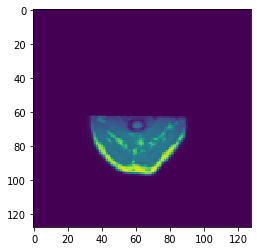

In [7]:
plt.imshow(brain_dataset[4]["x_cond"][0])

In [11]:
ct, mr = brain_dataset.load_images()

In [22]:
ct_data_array = np.concatenate(ct, axis=0)
mr_data_array = np.concatenate(mr, axis=0)

In [23]:
mr_data_array.shape

(661, 284, 284)

In [24]:
ct_data_array.shape

(661, 284, 284)

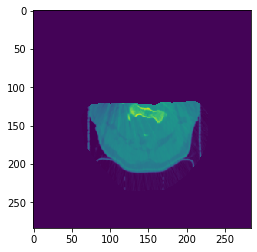

In [21]:
plt.imshow(data_array[4])

In [13]:
import matplotlib.pyplot as plt

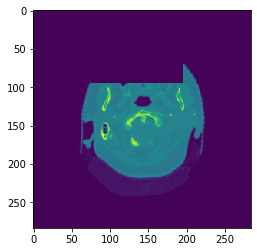

In [14]:
plt.imshow(ct[4][0].astype(float))

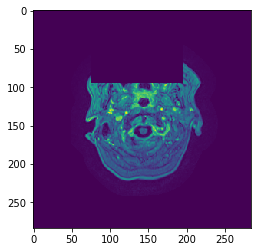

In [15]:
plt.imshow(mr[4][0].astype(float))

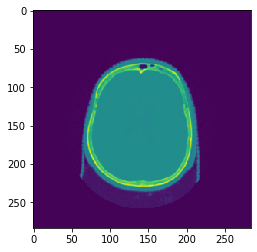

In [9]:
plt.imshow(mr[8][90])

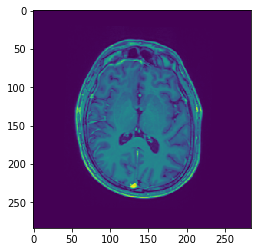

In [13]:
plt.imshow(mr[5][90])

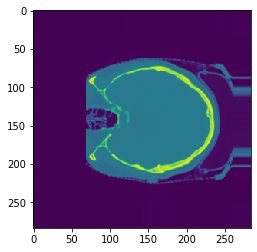

In [8]:
plt.imshow(mr[2][45])

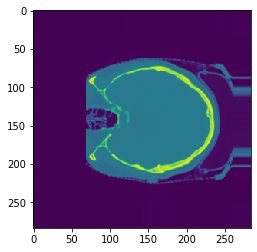

In [9]:
plt.imshow(ct[2][45])